# Topic 3. Algebraic data types

## 3.2 Product types

Think of the following types of values: 
* _Address_: an address is made of several values, namely the _names_ of the street and town, the _postal code_, the _number_, _floor_ and _door_ of the house, etc.
* _DNI_: the Spanish national identity card consists of its _number_, _expiration date_, _address_, _name_ of holder, etc. 
* _Course_: A course may consists of its _name_, _description_, _outline_, etc. 
* _Complex number_: a complex number is made of its real and imaginary real numbers.


In all of these cases, we define a complex type from a number of values of different types (primitive types, like strings or integers, or complex). So, we define an address given its street name, _and_ its town name, _and_ its postal code, etc. Types defined in this way, i.e. through the conjunction of other elements of information, are called _product_ types. 

### Constructors and destructors of product types

More formally, given two types $T_1$ and $T_2$ we can create a new type by creating their _product_ $(T_1, T_2)$. A value of the product type $(T_1, T_2)$ is created from a value of type $T_1$ _and_ a value of type $T_2$. Given a value of the product type $(T_1, T_2)$, we can extract information using the selectors $\_1$ and $\_2$. The following table summarizes the constructors and destructors of products, alongside those for functions to facilitate comparison:

### 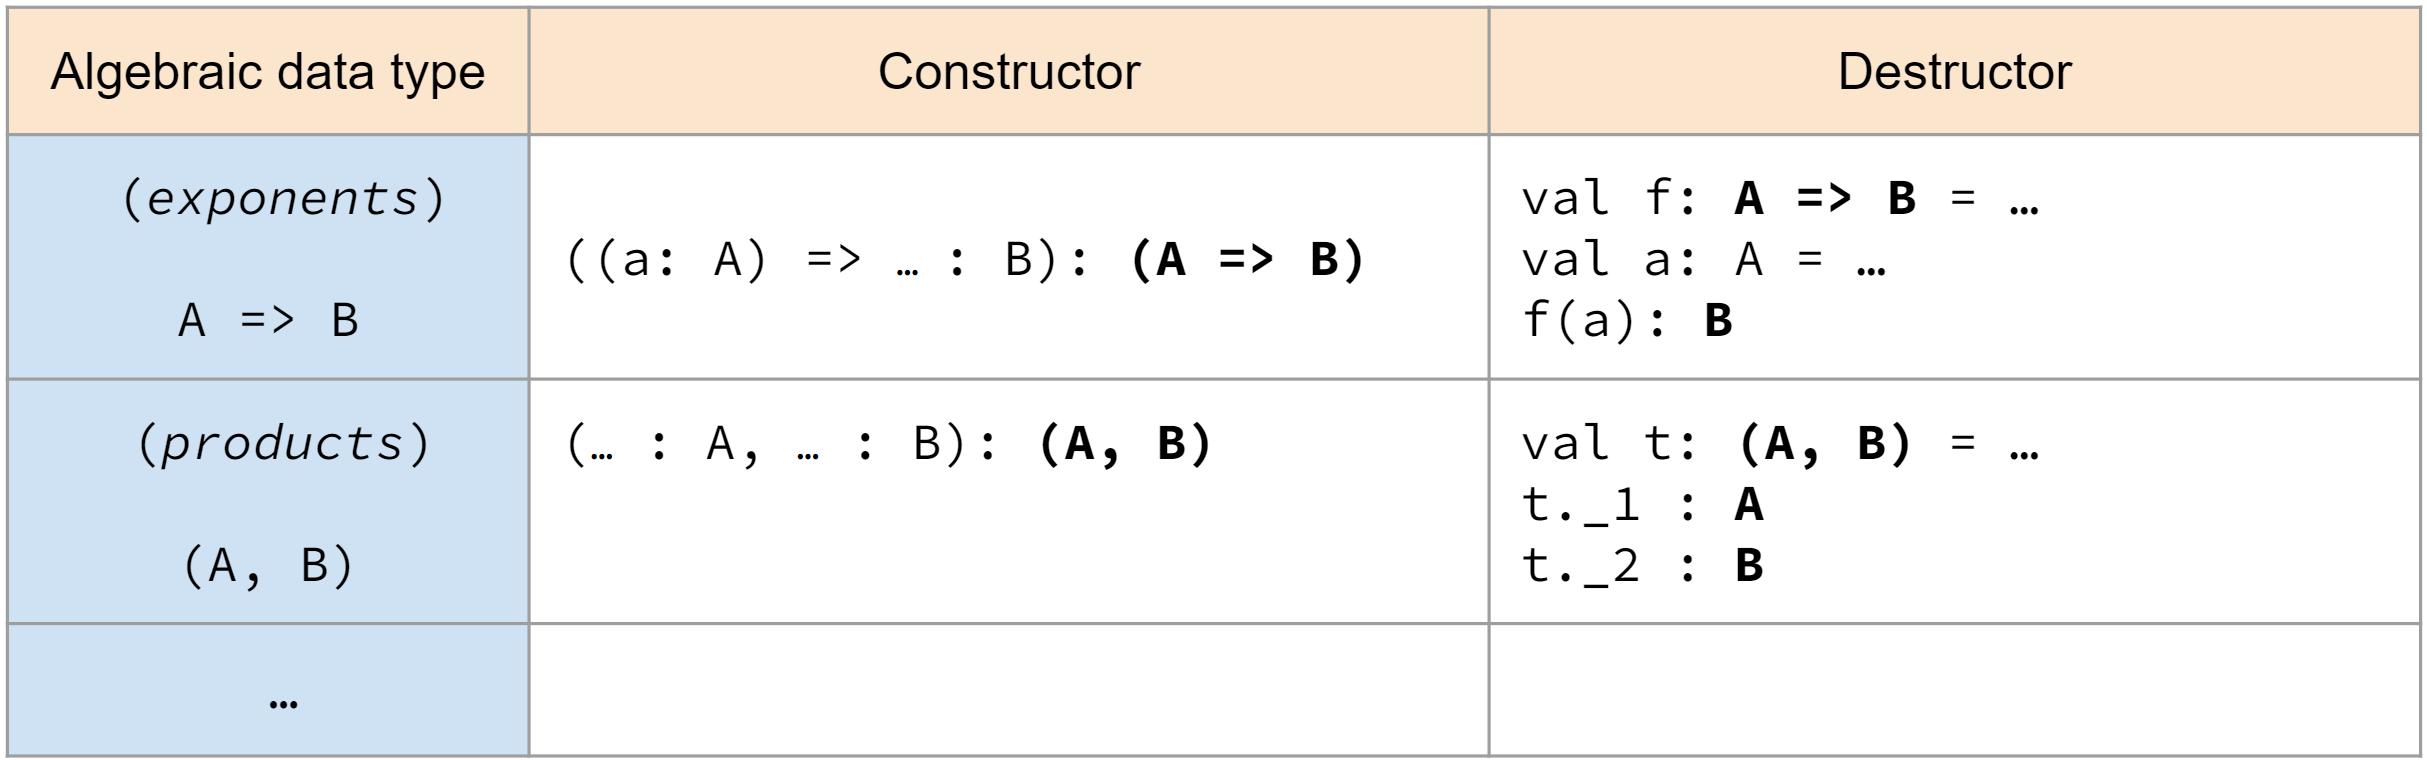

This table shows the constructors and destructors for products of two components, which in Scala are modeled by the [`Tuple2`](https://dotty.epfl.ch/api/scala/Tuple2.html) class. Note that the notation `(T1, T2)` is actually syntactic sugar for `Tuple2[T1, T2]`. For instance: 

In [ ]:
// type Complex



or without syntactic sugar as: 

In [ ]:
// type Complex with Tuple2


What if we need to model a product of three components or more? Using products of two components should be enough, because one of the components may be a product itself. However, this is cumbersome, so Scala offers standard products of three, four, up to twenty two components. For instance, we may define the address type using a `Tuple4` class:

In [ ]:
// type Address



We create values of type `Address` using the constructor `(..., ..., ..., ...)`: 

In [ ]:
// creating address values



and extract information using the selectors `_1`, `_2`, etc.: 

In [ ]:
// Accessing address components


#### Exercise
<div class="alert alert-info">
    Implement the <code>Address</code> type using only <code>Tuple2</code> products. Show an example of address construction and how you can access its different components.
</div>

##### Solution

In [ ]:
type Address = (String, // street name
                (Int,    // street number
                (String, // town name
                Int)))    // Postal code

val address1: Address = ("Atocha", (1, ("Madrid", 28000)))

val streetName: String = address1._1
val streetNumber: Int = address1._2._1
val townName: String = address1._2._2._1
val townNumber: Int = address1._2._2._2

##### Your solution

In [ ]:
// write you solution here


### Scala case classes

Product types allow us to extract information using general selectors `_1`, `_2`, etc., which are not very informative with regard to the particular kind of information that they represent. To solve this issue, we can resort to _record types_, which allow us to label each component of a record type. In Scala, records are modeled after `case classes`. For instance, using case classes we can define the type `Address` as follows:

In [ ]:
// Address with case class


This declaration of the `Address` record is essentially equivalent to the `Address` tuple from an informational point of view (the amount of information is the same). It changes, however, the way in which we can create and consume that piece of information:

In [ ]:
// Creating addresses


// Accessing components


Case classes are a lower level Scala mechanism which is used itself to define product. For instance, the `Tuple2` class is defined in a similar way to:

In [ ]:
object Std:
    // Tuple definitions


#### Exercise
<div class="alert alert-info">
    Define complex numbers using case classes. Create the complex number <code>i</code> (with real part 0.0 and imaginary one 1.0), and access its components.
</div>

##### Solution

In [ ]:
case class Complex(real: Double, imaginary: Double)

##### Your solution

### Why are products called _algebraic_?

For instance, how many values are there of type $(Boolean, Boolean)$?

In [ ]:
// Number of values of Boolean type: 2


// Number of values of (Boolean, Boolean) type: 2 * 2 



How about `(Boolean, Boolean, Boolean)`?

In [ ]:
// Number of values of (Boolean, Boolean, Boolean) type: 2 * 2 * 2



In general, the cardinal of $(A, B)$, for types $A$ and $B$ is: $|(A, B)| = |A| * |B|$. Indeed, since a product value is made of a number of components, we have as many product values as the number of choices we have for the first component, multiplied bythe number of choices we have for the second components, etc.

#### Exercise
<div class="alert alert-info">
    Assuming that the number of integer values is 2^32, and the following types <code>Type1</code> and <code>Type2</code>, which one has more values?
</div>

In [ ]:
type Type1 = (Int, Boolean)
type Type2 = Boolean => Int

##### Solution

|Type1| = |Int| * |Boolean| = (2^32) * 2 = 2^33

|Type2| = |Int| ^ |Boolean| = (2^32) ^ 2 = 2^(32^2)

Type2 has more values.

##### Your solution

### The type `1`

If product types are analogous to number multiplication, then, is there any type which corresponds to the number 1, i.e. the neutral element of the multiplication? It has to be a type $1$ such that $(A, 1) \cong A \cong (1, A)$, where the sign $\cong$ represents the _isomorphism_ of types, i.e. the types do not need to be equal but there should be a 1-1 mapping (a bijection) between the values of $A*1$ and $A$. We will talk later on isomorphisms in depth.

Now, what can we derived from the following equalities? 
* $|(A, 1)| = |A|$
* $|(1, A)| = |A|$

Given that $|(A, B)| = |A|*|B|$, then $|A| * |1| = |A|$. So, $|1| = 1$, i.e. $1$ must be the type with just one value, i.e. the equivalent to the singleton set. 


This type already exists in the Scala standard library: it's called `Unit`, and its only value is `()`:

In [ ]:
// The unit value


Which information can be extracted from a value of type `Unit`? The answer is none. So, for this type of algebraic data type there is a single constructor and no destructors: 

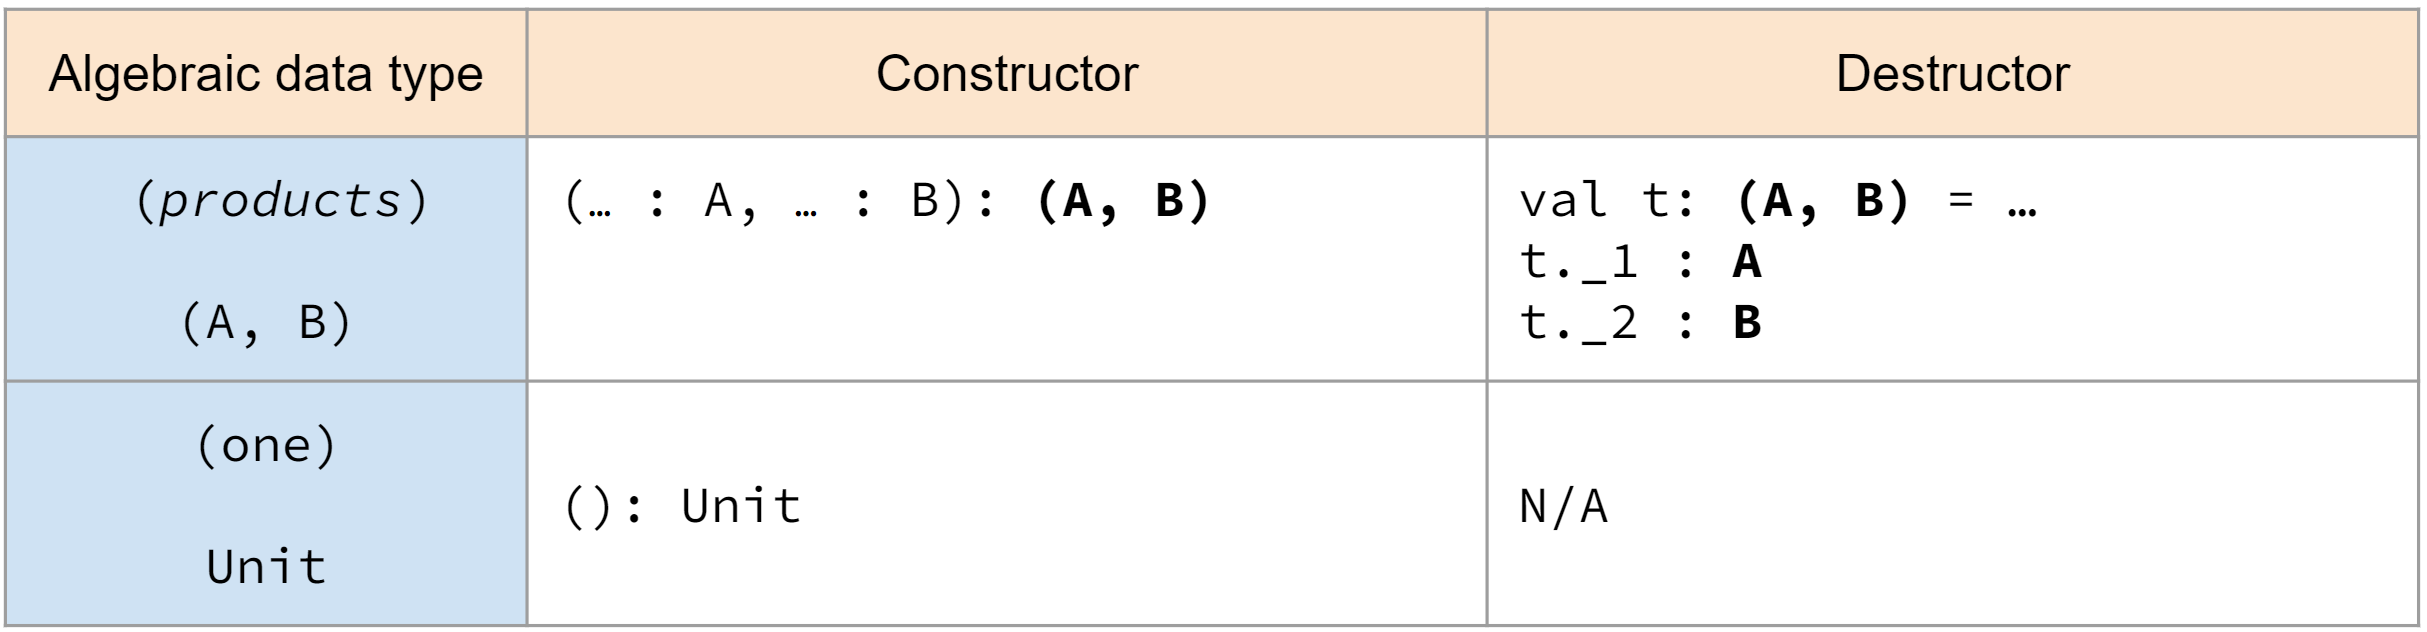

How many values are there of type $(Boolean, Unit)$? We can enumerate all possible values, but we can anticipate the result by simple calculation: 

$|(Boolean, Unit)| = |Boolean|*|Unit| = 2 * 1 = 2$

Indeed, these are the two values: 

In [ ]:
// values of type (Boolean, Unit)



#### Exercise
<div class="alert alert-info">
    Given a type <code>A</code>, how many functions are there of type <code>A => Unit</code> and <code>Unit => A</code>. Implement their values when <code>A</code> is the boolean type.
</div>

##### Solution

$|A => Unit| = |Unit|^{|A|} = 1^{|A|} = 1$

$|Unit => A| = |A|^|Unit| = |A|^1 = |A| $

In [ ]:
val v1: Boolean => Unit = 
    (b: Boolean) => ()

In [ ]:
val v1: Unit => Boolean = 
    (u: Unit) => false

val v2: Unit => Boolean = 
    (u: Unit) => true

#### Your solution

So, these functions are equivalent to `Unit` and `A`, respectively. But then, which is the purpose of writing functions which these signatures? For the first case, a function like the following one: 

In [ ]:
// Function Boolean => Unit



is only meaningful because of the possible _side effects_ implemented by its body, i.e. only if it's an impure function. Because, from a functional point of view, what this function can return is already known: the only possible value `()`. `Unit` is the Scala equivalent to Java's `void`.

Concerning functions of the following type:

In [ ]:
// Function Unit => Boolean 




Why shouldn't we define `foo` just a value of type `Boolean`? Because, basically, a value of that function type hides a boolean expression, that will be evaluated only when the function is consumed. This expression is also called a _thunk_. If evaluating the expression is computationally expensive and there are chances that the program does not actually need it, then it might be beneficial to use a thunk. This is also related to the so-called _lazy evaluation_ implemented by languages such as Haskell, by default. In scala, we can also defer the evaluation of some expression using the keyword `lazy`:

In [ ]:
// lazy values



It's only when we access the variables that the right-hand side of the variable assignment is evaluated: 

In [ ]:
// Access variables
